In [32]:
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
import json
from sklearn.preprocessing import StandardScaler

turning an image into array

In [33]:
temp_img = load_img('./cropped/0.jpg', color_mode='grayscale')

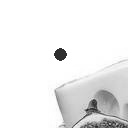

In [34]:
temp_img

In [35]:
temp_img_array = img_to_array(temp_img)

In [36]:
temp_img_array.shape

(128, 128, 1)

In [37]:
def generate_dataset():
    X = []
    Y = []
    
    # X
    files = glob.glob('./cropped/*.jpg')
    files.sort()
    for f in files:
        temp_img = load_img(f, color_mode='grayscale')
        arr      = img_to_array(temp_img)
        X.append(arr)
    X = np.asarray(X)
    X = X.astype('float32')
    X = X / 255.0
    
    # Y
    with open('labels.json') as f:
        data = json.load(f)
    for d in data:
        y = [(d['center'][0]-64), (d['center'][1]-64), d['radius']]
        Y.append(y)
    Y = np.asarray(Y)
    Y = Y.astype('float32')
    return X, Y

In [38]:
X, Y = generate_dataset() # this takes a while, idk why.

In [39]:
X.shape, Y.shape

((10220, 128, 128, 1), (10220, 3))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=111)


In [41]:
# CNNを構築
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(3))
# コンパイル
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])



In [ ]:
# 実行。出力はなしで設定(verbose=0)。
history = model.fit(X_train, y_train, batch_size=128, epochs=100,
                   validation_data = (X_test, y_test))


Epoch 1/100
54/54 [==============================] - 3s 63ms/step - loss: 126.8054 - mean_squared_error: 126.8054 - val_loss: 131.8549 - val_mean_squared_error: 131.8549
Epoch 2/100
54/54 [==============================] - 3s 63ms/step - loss: 126.5977 - mean_squared_error: 126.5977 - val_loss: 134.3229 - val_mean_squared_error: 134.3229
Epoch 3/100
54/54 [==============================] - 3s 63ms/step - loss: 126.9047 - mean_squared_error: 126.9047 - val_loss: 131.9890 - val_mean_squared_error: 131.9890
Epoch 4/100
54/54 [==============================] - 3s 63ms/step - loss: 126.8372 - mean_squared_error: 126.8372 - val_loss: 132.3943 - val_mean_squared_error: 132.3943
Epoch 5/100
54/54 [==============================] - 3s 63ms/step - loss: 126.4209 - mean_squared_error: 126.4209 - val_loss: 133.6941 - val_mean_squared_error: 133.6941
Epoch 6/100
54/54 [==============================] - 3s 63ms/step - loss: 126.5150 - mean_squared_error: 126.5150 - val_loss: 133.1147 - val_mean_squa

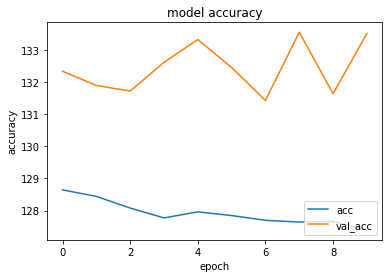

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

In [46]:
y_train[0]

array([ 9.,  6., 26.], dtype=float32)

In [47]:
model.predict(X_test)[:10]

array([[ 0.11771958, -0.40621808, 20.273153  ],
       [ 0.23624554, -0.3974289 , 19.238062  ],
       [ 0.16246584, -0.44428834, 20.275105  ],
       [ 0.13844208, -0.3739761 , 17.865639  ],
       [ 0.22123371, -0.45375454, 20.344955  ],
       [ 0.07486516, -0.45894265, 20.414692  ],
       [ 0.20467855, -0.40446612, 19.428253  ],
       [ 0.1569763 , -0.40872708, 18.91329   ],
       [ 0.08687222, -0.42300057, 20.291718  ],
       [ 0.27209765, -0.34446567, 16.094784  ]], dtype=float32)

In [48]:
y_test[:10]

array([[-13.,  18.,   5.],
       [  3.,  13.,  12.],
       [-17., -11.,  11.],
       [-15.,   6.,   6.],
       [-10., -16.,  19.],
       [  9.,   7.,   8.],
       [  5., -13.,  38.],
       [ 15., -17.,  24.],
       [  3.,   1.,  38.],
       [ -5.,   9.,  11.]], dtype=float32)

https://jp.mathworks.com/help/deeplearning/ug/train-a-convolutional-neural-network-for-regression.html

In [31]:
# TODO: Normalization?
# integer output made everthing pretty nice.
model.save('20210818-00')

INFO:tensorflow:Assets written to: 20210818-00\assets
